Right, this time, instead of predicting one day at a time and then only being able to predict multiple days into the future. We are going to predict n days at a time.

## Data Preprecessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
win_len = 100  # how many days the model uses to predict the next n days
pred_len = 100 # How many days to predict

### Fetch Latest Data

In [3]:
import yfinance as yf

In [4]:
msft = yf.Ticker("BTC-USD")
btc_usd_hist = msft.history(period="max")

### Load and split data

In [5]:
dataset = btc_usd_hist['Close']
data = dataset.values.reshape(-1,1) # get np array version

In [6]:
def train_test_split(data, pred_len):
    data_train = data[:-pred_len]
    data_test = data[-pred_len:]
    return data_train, data_test

In [7]:
train, test = train_test_split(data, pred_len)
print('Train: {} days, Test: {} days'.format(len(train), len(test)))

Train: 1945 days, Test: 100 days


### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

### Windowing Data

In [10]:
train.shape

(1945, 1)

In [11]:
X_train = np.array([train_scaled[i-win_len:i, 0] for i in range(win_len+pred_len, len(train))])

In [12]:
y_train = np.array([train_scaled[i:i+pred_len, 0] for i in range(win_len, len(train)-pred_len)])

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM

In [15]:
def build_lstm_model(data, num_neurons = 50, activ_func='linear', 
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    # layer 1
    model.add(LSTM(units=num_neurons, return_sequences=True, input_shape=(data.shape[1], 1)))
    model.add(Dropout(dropout))
    # layer 2
    model.add(LSTM(units=num_neurons, return_sequences=True))
    model.add(Dropout(dropout))
    # layer 3
    model.add(LSTM(units=num_neurons, return_sequences=True))
    model.add(Dropout(dropout))
    # layer 4
    model.add(LSTM(units=num_neurons))
    model.add(Dropout(dropout))
    # ouput layer
    model.add(Dense(units=pred_len))
    # model.add(Activation(activ_func))
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [16]:
model = build_lstm_model(X_train)

## Training the Model

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Train on 1745 samples
Epoch 1/100
1745/1745 [==============================] - 9s 5ms/sample - loss: 0.0294
Epoch 2/100
1745/1745 [==============================] - 1s 515us/sample - loss: 0.0089
Epoch 3/100
1745/1745 [==============================] - 1s 517us/sample - loss: 0.0074
Epoch 4/100
1745/1745 [==============================] - 1s 510us/sample - loss: 0.0065
Epoch 5/100
1745/1745 [==============================] - 1s 509us/sample - loss: 0.0055
Epoch 6/100
1745/1745 [==============================] - 1s 512us/sample - loss: 0.0043
Epoch 7/100
1745/1745 [==============================] - 1s 509us/sample - loss: 0.0038
Epoch 8/100
1745/1745 [==============================] - 1s 512us/sample - loss: 0.0037
Epoch 9/100
1745/1745 [==============================] - 1s 510us/sample - loss: 0.0034
Epoch 10/100
1745/1745 [==============================] - 1s 515us/sample - loss: 0.0032
Epoch 11/100
1745/1745 [==============================] - 1s 510us/sample - loss: 0.0031s - los
Epo

1745/1745 [==============================] - 1s 520us/sample - loss: 0.0011
Epoch 93/100
1745/1745 [==============================] - 1s 512us/sample - loss: 0.0011
Epoch 94/100
1745/1745 [==============================] - 1s 512us/sample - loss: 0.0012
Epoch 95/100
1745/1745 [==============================] - 1s 504us/sample - loss: 0.0012
Epoch 96/100
1745/1745 [==============================] - 1s 510us/sample - loss: 0.0012
Epoch 97/100
1745/1745 [==============================] - 1s 517us/sample - loss: 0.0011
Epoch 98/100
1745/1745 [==============================] - 1s 517us/sample - loss: 0.0011
Epoch 99/100
1745/1745 [==============================] - 1s 508us/sample - loss: 0.0011
Epoch 100/100
1745/1745 [==============================] - 1s 509us/sample - loss: 0.0011


## Testing the Model

### Get Predicted Values

In [18]:
inputs = sc.transform(train[-win_len:])

In [19]:
X_test = np.reshape(inputs, (1, inputs.shape[0], inputs.shape[1]))

In [20]:
prediction = model.predict(X_test)

In [21]:
preds = sc.inverse_transform(prediction.reshape(-1,1))

### Plot predicted values versus expected values

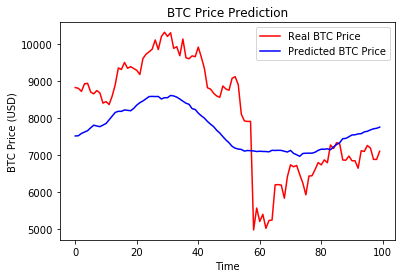

In [22]:
plt.plot(test, color = 'red', label = 'Real BTC Price')
plt.plot(preds, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()

## Prediction the future

In [18]:
inputs = sc.transform(data[-win_len:])

In [19]:
inputs = np.reshape(inputs, (1, inputs.shape[0], inputs.shape[1]))

In [20]:
prediction = model.predict(inputs)

In [21]:
preds = sc.inverse_transform(prediction.reshape(-1,1))

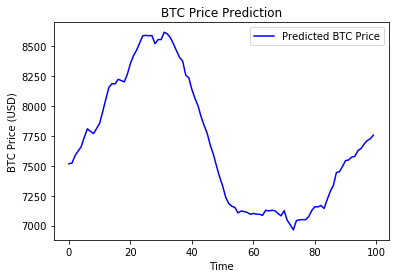

In [23]:
plt.plot(preds, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()